# Measuring Simultaneous Change in Two Random Variables

## Introduction 

In this sectino you have been learning about random variables. You've learned that the set of possible values of a random variable may be measured and plotted with a distribution, and you've learned about some of this distribution's parameters, the mean and the standard deviation. In the previous lesson you learned that the standard deviation ($\sigma$, lower-case sigma) measures how the data in a distribution are dispersed away from the mean value. The standard deviation is useful to measure the spread of the distribution a single random variable. But what if we want to compare the spreads of two different random variables? Two distributions that change together in a positive or negative way might share a relationship, and observing and measuring such a relationship may yield the sort of insights that a data scientist could present to their organization. We can measure how the distributions of two random variables change together using variance, covariance, and correlation.

## Objectives

You will be able to

* calculate the variance of the distribution of a random variable based on its standard deviation
* calculate the covariance and correlation of the distributions of two random variables
* distinguish covariance and correlation and use the results of each measure to make obversations about the relationship between two random variables

## Standard Deviation ($\sigma$) and Variance ($\sigma^2$)

If the standard deviation measures the spread of values away from the mean of a distribution in one direction, then its square, variance, measures the spread away in both directions. It tells us how much the data varies from its mean. Let's look at an uncontroversial example: carrot length. Let's assume that carrot length is a normally-distributed random variable, and let's say that the mean length of 1000 carrots in a produce market is 20cm.

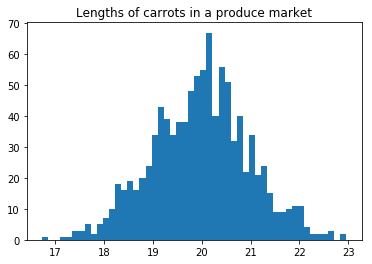

In [9]:
#Mean: carrot length in cm
mu = 20

#Size of population: number of carrots in market
n = 1000

# Random variable, normally-distributed: carrot length
import numpy as np
carrot_lengths = np.random.normal(loc = mu, size = n)

# Plot the distribution
import matplotlib.pyplot as plt
plt.hist(carrot_lengths, bins = 50)
plt.title('Lengths of carrots in a produce market')
plt.show()

The distribution doesn't look *totally* normal - few real-life distributions do - but if the market stocked, say, 100,000 carrots instead of 1,000, we might see the distribution tend more toward normality. Let's assume it's important to know how many carrots are of average length and how many are extra long or short. (Maybe the average-length carrots fit the best in the display bin and the others have to be kept in the back.) We want to know how many deviate from the standard. Recall the formula for calculating standard deviation:

$$\sigma = \sqrt{\frac{\sum(x-\mu)^2}{n}}$$

To get the standard deviation ($\sigma$), we take the difference between each value in the distribution and the mean (x-$\mu$), square it, take the sum of all these squares $(\sum)$, divide by the population size (n), and take the square root.

In [11]:
#Function to calculate standard deviation
def std(X, mu, n):
    
    sigma = np.sqrt(
                    np.sum(
                                (X - mu)**2
                           ) / n
                    )
    return sigma

Remember that the distribution of carrot lengths is normal so we can expect its standard deviation to be 1.

In [12]:
std(carrot_lengths, mu, n) #Should return value of 1

0.9914158396050631





In this lesson, we shall look at how **Variance** of a random variable is used to calculate **Covariance** and **Correlation**, two key measures used in Statistics for finding the relationships between random variables. These measures help us identify the degree to which two set of data tend to deviate from their expected value (i.e. mean), in a similar way. Based on these measures, we can identify if two variable are dependent on each other, and to what extend. This lesson will help you develop a conceptual understanding, necessary calculations and some precautions while using these measures. 

## Objectives

You will be able to

* Understand and explain data variance and how it relates to standard deviation
* Understand and calculate Covariance and Correlation between two random variables
* Visualize and interpret the results of Covariance and Correlation

## What is Variance ($\sigma^2$)

Before we talk about covariance , it is imperative that we get some idea around **Variance** of a random variable. Variance refers to the __spread of a data set__. 

> __Variance is a measure used to quantify how much a random variable deviates from its mean value__. 

When we calculate variance, we are essentially asking, "__Given the relationship of all given data points, how much distant from mean do we expect the next data point to be?__"  This "distance" is called the **error term**, and it's what variance is measuring. 

Variance is shown using notatioin $\sigma^2$. Previously, we have seen $\sigma$ as a measure of standard deviation within a given dataset. Remember standard deviation is also a measure of spread of data. __Variance is simply the square of standard deviation (Or we could say standard deviation is is the square root of variance)__. 

### Example Use Case

For example, a simple application of this measure could be associating probabilities with predicted future events in a market research activity, identifying them as "very likely" or "unlikely" etc. Most people are risk averse, in that they wish to minimize the amount of risk they must endure to earn a certain level of expected return. If investors were indifferent to risk, they would not be influenced by the differences between stock A and stock B above, whereas the risk-averse investor would clearly prefer stock A. Therefore, most people want to know the range or dispersion(spread/deviation as we termed it earlier) of possible outcomes, as well as the likelihood of certain outcomes occurring. Variance measure is a great way to find all of the possible values and likelihoods that a random variable can take within a given range defined by the underlying data. 


Consider the following graphs for Conglomo, Inc. and Bilco, Inc. These graphs show the theoretical frequency distributions of the monthly returns for each firm's common stock as though the returns were normally distributed.

<img src="images/var.png" width=400>

Conglomo's distribution of returns is more concentrated than Bilco's, as illustrated by Conglomo's relatively wider bell curve. A more concentrated distribution is defined as having a smaller standard deviation. The distribution curve appears higher, steeper, and narrower because more observations are occurring close to the expected return. Bilco's distribution is rather flat, reflecting that its returns are less concentrated, or more dispersed, than those of Conglomo Inc.

### Interpreting Variance 

A variance value of zero represents that all of the values within a data set are identical, while all variances that are not equal to zero will come in the form of positive numbers. The larger the variance, the more spread in the data set. A large variance means that the numbers in a set are far from the mean and each other. A small variance means that the numbers are closer together in value. 
### How to Calculate Variance? 

Variance is calculated by:
1. Taking the differences between each element in a data set and the mean, 
2. Squaring those differences to give it a positive value
3. Dividing the sum of the resulting squares by the number of values in the set.

$$\sigma^2 = \frac{\sum(x-\mu)^2}{n}$$

Here, $x$ represents an individual data point and $\mu$ represents the mean of the data points. $N$ is the total number of data points. Remember that while calculating a sample variance in order to estimate a population variance, the denominator of the variance equation becomes n - 1. This removes bias from the estimation, as it prohibits the researcher from underestimating the population variance.

Following illustration summarizes how spread of data around mean (10) relates to the variance. 

<img src="images/var2.png" width=500>


## Covariance ($\sigma_{xy}$)

Now that we know what variance is what quantity it measures, imagine calculating variance of two random variables to get some idea on how they change together (or stay the same) considering all included values.

In Stats, If we are trying to figure out how two random variables tend to **vary** together, we are effectively talking about **Covariance** between these variables. Covariance provides an insight into how two variables are __related__ to one another. 

More precisely, covariance refers to:
> The measure of how two random variables in a data set will __change together__. 
  
### How to calculate Covariance ?
In essence, covariance is used to measure **how much variables change *together* **, and its calculated using the formula:


$$ \large \sigma_{XY} = \frac{\sum_{i=1}^{n}(x_i -\mu_x)(z_i - \mu_y)}{n}$$

Here $X$ and $Y$ are two random variables having n elements each. We want to caluclate ___how much $Y$ depends on $X$___ (or vice-versa), by measuring how values in $Y$ change with observed changes in $X$ values. 

> This makes $X$ our __independent variable__ and $Y$, the __dependent variable__.  

$xi$ = ith element of variable $X$

$yi$ = ith element of variable $Y$

$n$ = number of data points (__$n$ must be same for $X$ and $Y$__)

$\mu_x$ = mean of the independent variable $X$

$\mu_y$ = mean of the dependent variable $Y$

$\sigma_{XY}$ = Covariance between $X$ and $Y$

*We can see that above formula calculates the variance of $X$ and $Y$ (check the variance formula above) by multiplying the variance of each of their corresponding elements. Hence the term __Co-Variance__.*

### Interpreting Covariance values 

* A positive covariance indicates that **higher than average** values of one variable tend to pair with higher than average values of the other variable.

* Negative covariance indicates that lower than average values of one variable tend to pair with **lower than average** values of the other variable. 

* a zero value, or values close to zero indicate no covariance, i.e. no values from one variable can be paired with values of second variable. 

This behavior can be further explained using the scatter plots below
<img src="images/covariance.gif" width=500>



A large negative covariance value show an inverse relationship between values at x and y axes. i.e. y decreases as x increases. This is shown by the scatter plot on the left. The middle scatter plot shows values spread all over the plot, reflecting the fact that variables on x and y axes can not be related in terms of how they vary together. The covariance value for such variables would be very close to zero. 

In the scatter plot on right, we see a strong relationship between values at x and y axes i.e. y increases as x increases. 

>__Covariance is not standardized. Therefore, covariance values can range from negative infinity to positive infinity.__

## Correlation 

Above, we saw how covariance can identify the degree to which two random variables tend to vary together, while using a formulation that depends on the units of $X$ and $Y$ variables. During data analysis, covariance measure can not be directly used in data comparison as it different experiments may contain underlying data, measured in different units. For this, we need to normalize this degree of variation into a standard unit, with interpretable results independent of the units of data. We achieve this with a derived normalized measure, called correlation. 

Correlation is defined as covariance, normalized by the square rooted product of standard deviations of $X$ and $y$. This normalization helps us set the scale from 0 to 1. So the correlation between 𝑋 and 𝑌 would be calculated as:

$$Correlation(X,Y) = \frac{\sigma_{X,Y}}{\sqrt{\sigma_X\sigma_Y}}$$

>When two random variables **Correlate**, this reflects that the change in one item **effects** the change in the values of second variable. 

In data science practice, we typically to look at correlation rather than covariance because it is more interpretable, since it does not depend on the scale of either random variable involved.


### Use Cases


#### Social Media and Websites
Digital publishers want to maximize their understanding of the potential relationship between social media activity and visits to their website. For example, the digital publisher runs the correlation report between hourly Twitter mentions and visits for a two week period. The correlation is found to be r = 0.28, which indicates a medium, positive relationship between Twitter mentions and website visits.

#### Optimization for E-retailers
E-retailers are interested in driving increased revenue. For example, an e-retailer wants to compare a number of secondary success events (e.g., file downloads, product detail page views, internal search click-throughs, etc.) with weekly web revenue. They can quikly identify internal search click-throughs as having the highest correlation, which may indicate an area for optimization.

### Types of Correlation Measures

__Coefficient of correlation__, r, called the linear correlation coefficient, measures the strength and the direction of a linear relationship between two variables. It also called as __Pearson correlation coefficient__. 

In statistics, we measure four types of correlations for detailed relationship analysis: 
* Pearson correlation 
* Kendall Rank correlation 
* Spearman correlation
* Point-Biserial correlation. 


For now, we shall focus on Pearson correlation as it is the go-to correlation measure for most needs. 

Pearson __r__ correlation is the most widely used correlation statistic to measure the degree of the relationship between two linearly related variables. For the Pearson r correlation, both variables should be normally distributed (normally distributed variables have a bell-shaped curve). Other assumptions include linearity and homoscedasticity. Linearity assumes a straight line relationship between each of the two variables and homoscedasticity assumes that data is equally distributed about the regression line.


### Calculating Coefficient of Correlation (r)

Pearson Correlation (r) is calculated using following formula :

$$ r = \frac{\sum_{i=1}^{n}(x_i -\mu_x)(y_i - \mu_y)} {\sqrt{(\sum_{i=1}^{n}x_i - \mu_x)^2 (\sum_{i=1}^{n}y_i-\mu_y)^2}}$$

So just like in the case of covariance,  $X$ and $Y$ are two random variables having n elements each. 


$xi$ = ith element of variable $X$

$yi$ = ith element of variable $Y$

$n$ = number of data points (__$n$ must be same for $X$ and $Y$__)

$\mu_x$ = mean of the independent variable $X$

$\mu_y$ = mean of the dependent variable $Y$

$r$ = Calculated Pearson Correlation


Here x and y are the random variables, x_bar and y_bar are the mean values for both x and y. A detailed mathematical insight into this equation is available [in this paper](http://www.hep.ph.ic.ac.uk/~hallg/UG_2015/Pearsons.pdf)

### Interpreting Correlation values

> __Correlation formula shown above always gives values in a range between -1 and 1__

If two variables have a correlation of +0.9,  this means the change in one item results in an almost similar change to another item. A correlation value of -0.9 means that the change is one variable results as an opposite change in the other variable. A pearson correlation near 0 would be no effect. Here are some example of pearson correlation calculations as scatter plots. 
![](pearson_2.png)

Think about stock markets in terms of correlation. All the stock market indexes tend to move together in similar directions. When the DOW Jones loses 5%, the S&P 500 usually loses around 5%. When the DOW Jones gains 5%, the S&P 500 usually gains around 5% because they are **highly correlated**.

On the other hand, there could also be negative correlation where you might observe that as the DOW Jones loses 5% of it value, Gold might gain 5%. Alternatively, if the Dow Jones gains 5% of its value, Gold may lose 5% of its value. That's **negative correlation**. 

### So how do these measures relate to each other ?

Are Covariance and Correlation The Same Thing? Simply put, no.

While both covariance and correlation indicate whether variables are positively or inversely related to each other, they are not considered to be the same. This is because correlation also informs about the degree to which the variables tend to move together. 

Covariance is used to measure variables that have different units of measurement. By leveraging covariance, analysts are able to determine weather units are increasing or decreasing, but they are unable to solidify the degree to which the variables are moving together due to the fact that covariance does not use one standardized unit of measurement.

Correlation, on the other hand, standardizes the measure of interdependence between two variables and informs researchers as to how closely the two variables move together.

## Summary
In this lesson, we looked at Identifying the variance of random variables as a measure of mean deviation. We saw how this measure can be used to first calculate covariance, followed by the correlation to analyze how change variable effects the change of another variable. Next, we shall see how we can use correlation analysis to run a __regression analysis__ and later, how covariance calculation helps us with dimensionality reduction. 